In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology, segmentation
import skimage as ski
from scipy import ndimage as ndi
import nd2

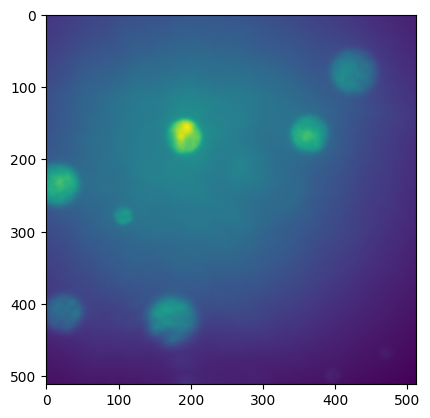

In [2]:
file_path = "./AL001c2_3_mwm_009.nd2"

img = nd2.imread(file_path)
plt.imshow(img)

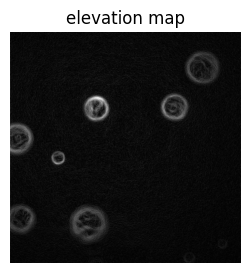

In [3]:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_coins_segmentation.html#region-based-segmentation
elevation_map = ski.filters.sobel(img)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.set_axis_off()

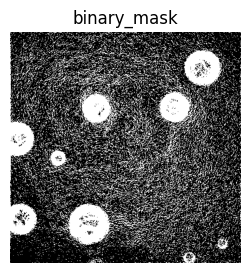

In [4]:
img_norm = (elevation_map - elevation_map.min()) / (elevation_map.max() - elevation_map.min() + 1e-6)
local_thresh = filters.threshold_local(img_norm, 1001)
binary_mask = img_norm > local_thresh

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(binary_mask, cmap=plt.cm.gray)
ax.set_title('binary_mask')
ax.set_axis_off()

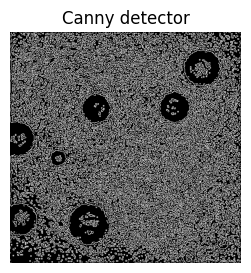

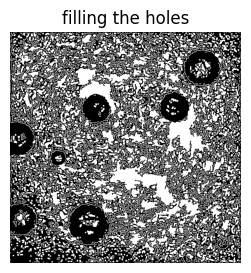

In [8]:
edges = ski.feature.canny(binary_mask)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.set_axis_off()

fill = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.set_axis_off()


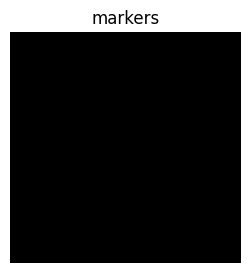

In [10]:
markers = np.zeros_like(img)
markers[img < 100] = 1
markers[img > 100] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.set_axis_off()